YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


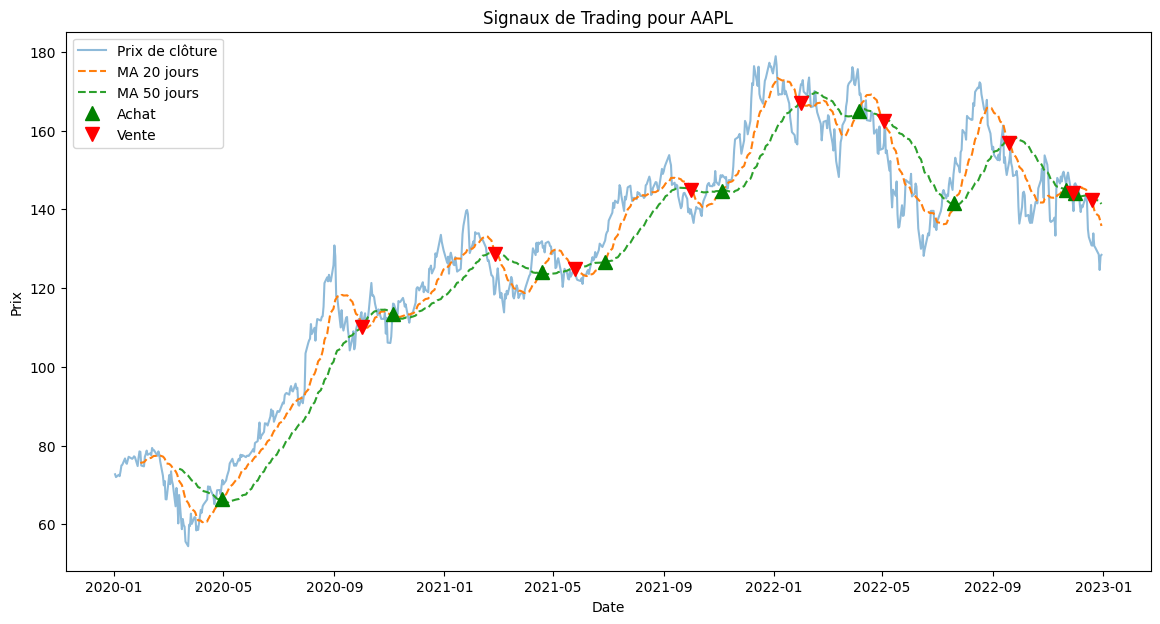

In [1]:
# Importation des bibliothèques
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Définition des paramètres
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-01-01'
short_window = 20  # Moyenne mobile courte (ex. 20 jours)
long_window = 50   # Moyenne mobile longue (ex. 50 jours)

# 1. Télécharger les données historiques via Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

# 2. Calcul des moyennes mobiles
data['SMA_short'] = data['Close'].rolling(window=short_window).mean()
data['SMA_long'] = data['Close'].rolling(window=long_window).mean()

# 3. Génération des signaux de trading
# Signal = 1 pour un signal d'achat, -1 pour un signal de vente, 0 pour aucun signal
data['Signal'] = 0
data.loc[data['SMA_short'] > data['SMA_long'], 'Signal'] = 1
data.loc[data['SMA_short'] < data['SMA_long'], 'Signal'] = -1

# Optionnel : Créer une colonne "Position" pour détecter les changements de signal
data['Position'] = data['Signal'].diff()

# 4. Visualisation
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Prix de clôture', alpha=0.5)
plt.plot(data['SMA_short'], label=f'MA {short_window} jours', linestyle='--')
plt.plot(data['SMA_long'], label=f'MA {long_window} jours', linestyle='--')

# Marquer les signaux d'achat et de vente sur le graphique
plt.plot(data[data['Position'] == 2].index, data['SMA_short'][data['Position'] == 2], '^', markersize=10, color='g', label='Achat')
plt.plot(data[data['Position'] == -2].index, data['SMA_short'][data['Position'] == -2], 'v', markersize=10, color='r', label='Vente')

plt.title(f'Signaux de Trading pour {ticker}')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.show()
